# Maximum Sharpe Ratio Baseline

In [3]:
# make the current working directory the project root directory
import os
PROJECT_ROOT_DIRECTORY = 'senior_project'
while os.path.basename(os.getcwd()) != PROJECT_ROOT_DIRECTORY:
    os.chdir(os.pardir)
print('Current working directory:', os.getcwd())

Current working directory: c:\Users\pavan\Desktop\senior_project


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import yfinance as yf
from environments.discrete_env_v1 import PortfolioManagementEnv

from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import risk_matrix
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import plotting

(CVXPY) Mar 10 01:00:40 PM: Encountered unexpected exception importing solver OSQP:
ImportError('DLL load failed while importing qdldl: The specified module could not be found.')


## Example

In [5]:
TICKERS = ['AXP', 'AAPL', 'BA', 'GS', 'INTC', 'JNJ', 'KO', 'NKE', 'PG', 'DIS']

RETURN_COLS = ['RF_RETURN'] + [f'{ticker}_RETURN' for ticker in TICKERS]

FEATURE_COLS = [f'{ticker}_RETURN' for ticker in TICKERS]

In [6]:
df = pd.read_csv('data/dow_10_returns.csv', index_col=0, parse_dates=True)
df.head()

,RF_RETURN,AXP_RETURN,AAPL_RETURN,BA_RETURN,GS_RETURN,INTC_RETURN,JNJ_RETURN,KO_RETURN,NKE_RETURN,PG_RETURN,DIS_RETURN
2010-01-04,0.000150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,0.000146,-0.002199,0.001729,0.032752,0.017680,-0.000479,-0.011595,-0.012097,0.003979,0.000327,-0.002494
2010-01-06,0.000148,0.016165,-0.015906,0.030334,-0.010674,-0.003354,0.008133,-0.000355,-0.006097,-0.004743,-0.005314
2010-01-07,0.000149,0.016219,-0.001849,0.040482,0.019568,-0.009615,-0.007137,-0.002485,0.009815,-0.005423,0.000314
2010-01-08,0.000148,-0.000715,0.006649,-0.009646,-0.018911,0.011165,0.003439,-0.018509,-0.001975,-0.001322,0.001571


## Optimal Portfolio for Different Window Sizes

In [7]:
# `window_size` < 30 is too unstable and causes problems during optimization
WINDOW_SIZES = [30, 60, 90, 180, 252, 504]
portfolio_returns_list = []

<span style="color:red">**(Run Once)**</span>

  0%|          | 0/6 [00:00<?, ?it/s]

c:\Users\pavan\anaconda3\envs\rl_env\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\pavan\anaconda3\envs\rl_env\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Window size: 30
Value error count: 110
Other error count: 1




c:\Users\pavan\anaconda3\envs\rl_env\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\pavan\anaconda3\envs\rl_env\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\pavan\anaconda3\envs\rl_env\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Window size: 60
Value error count: 69
Other error count: 0




c:\Users\pavan\anaconda3\envs\rl_env\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\pavan\anaconda3\envs\rl_env\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\pavan\anaconda3\envs\rl_env\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Window size: 90
Value error count: 33
Other error count: 0


Window size: 180
Value error count: 27
Other error count: 0




c:\Users\pavan\anaconda3\envs\rl_env\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\pavan\anaconda3\envs\rl_env\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\pavan\anaconda3\envs\rl_env\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Window size: 252
Value error count: 2
Other error count: 0


Window size: 504
Value error count: 0
Other error count: 0




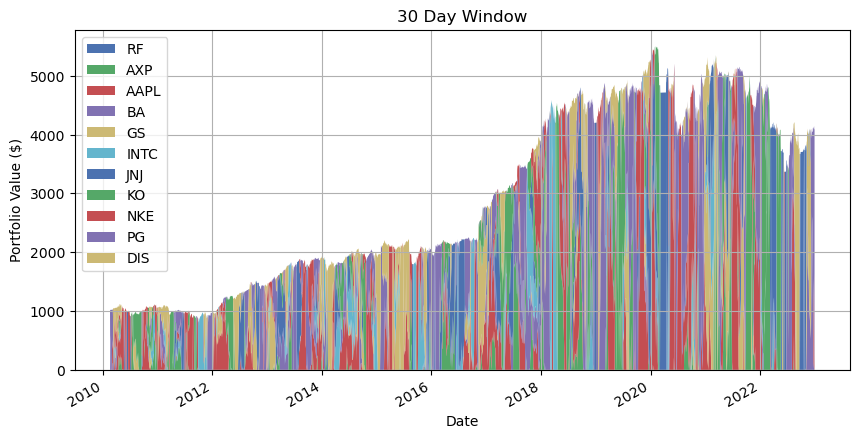

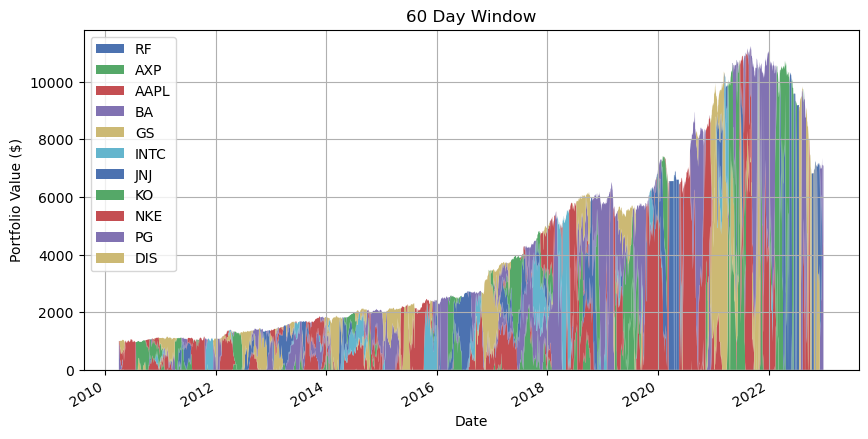

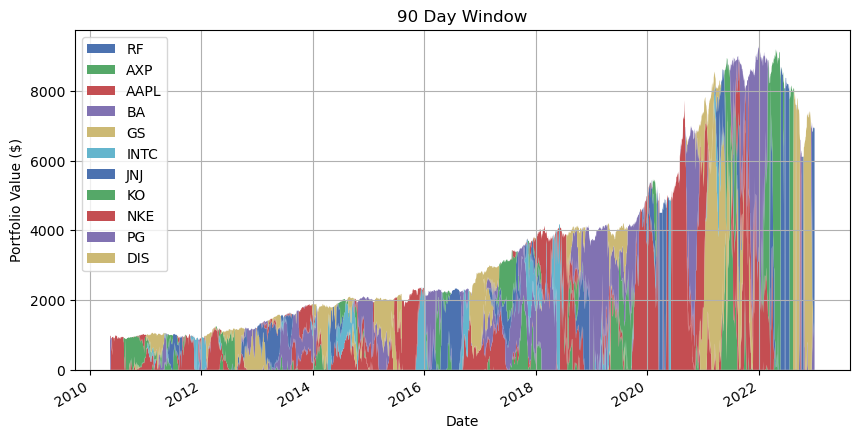

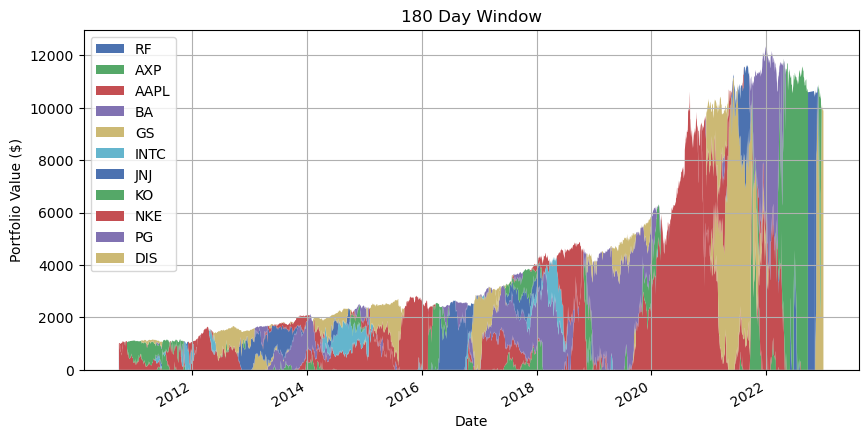

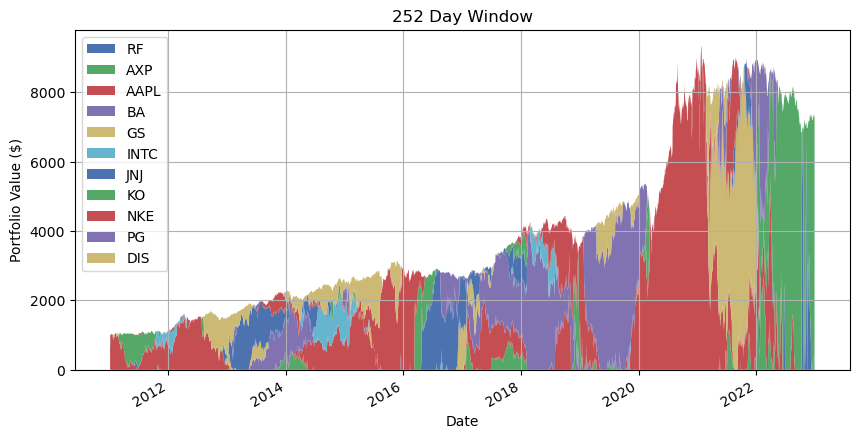

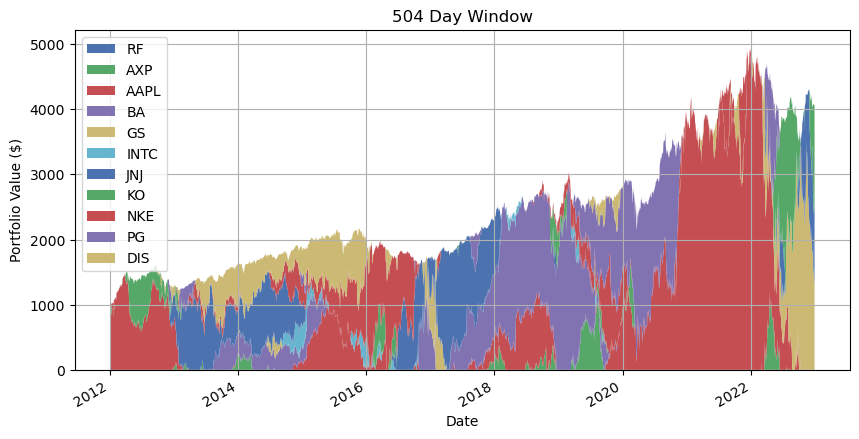

In [7]:
# for window_size in tqdm(WINDOW_SIZES):
    
#     value_error_count, other_error_count = 0, 0
#     np.random.seed(5)
#     env = PortfolioManagementEnv(df, RETURN_COLS, FEATURE_COLS, episode_length=-1, window_size=window_size)

#     obs, done = env.reset(), False
#     while not done:
        
#         observation_df = pd.DataFrame(obs.reshape(-1, env.NUM_ASSETS), columns=FEATURE_COLS)
#         mu = mean_historical_return(observation_df, returns_data=True)
#         S = risk_matrix(observation_df, returns_data=True, method='sample_cov')
#         ef = EfficientFrontier(mu, S)
        
#         try:
#             weights = ef.max_sharpe(risk_free_rate=(1+env.RETURNS[env.current_index,0])**252-1)
#             cleaned_weights = ef.clean_weights()
#             env.current_allocations = np.insert(np.array([w for w in cleaned_weights.values()]), 0, 0)
#         except ValueError: # for when none of the assets must have an expected return exceeding the risk-free rate
#             env.current_allocations = np.insert(np.zeros(len(FEATURE_COLS)), 0, 1) # invest everything into the risk free rate
#             value_error_count += 1
#         except:
#             other_error_count += 1
        
#         obs, reward, done, info = env.step(env.NUM_ASSETS) # do nothing
    
#     print(f'Window size: {window_size}')
#     print(f'Value error count: {value_error_count}')
#     print(f'Other error count: {other_error_count}')
#     print('\n')
#     portfolio_returns_list.append(env.get_portfolio_returns())
#     env.render()
#     plt.title(f'{window_size} Day Window')
#     env.close()

## DIJA

In [8]:
dija_returns = yf.download('^DJI', start = '2010-01-01', end = '2022-12-31', interval = '1d')['Adj Close'].pct_change(1)

[*********************100%***********************]  1 of 1 completed


In [9]:
results_df = pd.read_csv('experiments/results_df.csv', index_col=0, parse_dates=True)
# results_df = pd.DataFrame(index=df.index)
# results_df['BASELINE_DJIA'] = dija_returns
# for i in range(len(WINDOW_SIZES)):
#     results_df[f'BASELINE_SR_{WINDOW_SIZES[i]}_DAY'] = portfolio_returns_list[i]
results_df.tail()

,BASELINE_DJIA,BASELINE_SR_30_DAY,BASELINE_SR_60_DAY,BASELINE_SR_90_DAY,BASELINE_SR_180_DAY,BASELINE_SR_252_DAY,BASELINE_SR_504_DAY,EXPERIMENT_1_1678367587_TRAIN,EXPERIMENT_1_1678367587_VAL,EXPERIMENT_2_1678378331_TRAIN,EXPERIMENT_2_1678378331_VAL
2022-12-23,0.005342,0.001178,0.004303,0.002890,-0.000203,0.007296,0.003689,NaN,NaN,NaN,NaN
2022-12-27,0.001133,0.009721,0.004514,-0.000045,-0.010246,0.005801,-0.001770,NaN,NaN,NaN,NaN
2022-12-28,-0.011006,-0.014135,-0.008171,-0.004546,-0.003217,-0.009967,-0.006101,NaN,NaN,NaN,NaN
2022-12-29,0.010497,0.004160,0.004050,0.004735,0.007510,0.005978,0.006238,NaN,NaN,NaN,NaN
2022-12-30,-0.002214,-0.005613,0.001937,-0.000023,-0.000146,-0.005317,-0.003473,NaN,NaN,NaN,NaN


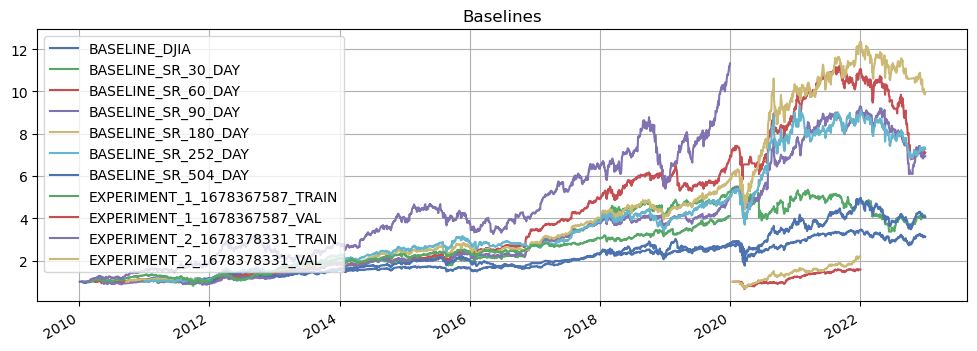

In [10]:
(1+results_df).cumprod().plot(title='Baselines', figsize=(12,4), grid=True);

<span style="color:red">**Running this will reset results_df, only run once!**</span>

In [27]:
# # Running this will reset results_df! Only run it once
# results_df.to_csv('experiments/results_df.csv')

In [17]:
def evaluate_returns(returns):
    returns = returns[~returns.isna()]
    length = len(returns)
    mu = (1+returns).prod()**(252/length)-1
    sigma = np.sqrt(returns.var() * 252)
    print(f'Length: {length}')
    print(f'Annualized Return: {mu}')
    print(f'Annualized Risk: {sigma}')
    print(f'Sharpe Ratio: {mu/sigma}')

In [23]:
BSELINE_COL_NAMES = [
    'BASELINE_DJIA', 'BASELINE_SR_30_DAY', 'BASELINE_SR_60_DAY', 'BASELINE_SR_90_DAY', 
    'BASELINE_SR_180_DAY', 'BASELINE_SR_252_DAY', 'BASELINE_SR_504_DAY'
]

In [26]:
for baseline in BSELINE_COL_NAMES:
    print(baseline)
    evaluate_returns(results_df[baseline])
    print()

BASELINE_DJIA
Length: 3271
Annualized Return: 0.09193479869008625
Annualized Risk: 0.17264676221273054
Sharpe Ratio: 0.5325023041950057

BASELINE_SR_30_DAY
Length: 3242
Annualized Return: 0.11548690038680443
Annualized Risk: 0.2011351109537052
Sharpe Ratio: 0.5741757360970446

BASELINE_SR_60_DAY
Length: 3212
Annualized Return: 0.16630499864954862
Annualized Risk: 0.19996820515924227
Sharpe Ratio: 0.8316572052897792

BASELINE_SR_90_DAY
Length: 3182
Annualized Return: 0.16589522848362703
Annualized Risk: 0.20261149808289167
Sharpe Ratio: 0.8187848668675092

BASELINE_SR_180_DAY
Length: 3092
Annualized Return: 0.2057493888044497
Annualized Risk: 0.22078602933312727
Sharpe Ratio: 0.9318949637615435

BASELINE_SR_252_DAY
Length: 3020
Annualized Return: 0.18029713356164834
Annualized Risk: 0.22297417216677068
Sharpe Ratio: 0.8086009774566958

BASELINE_SR_504_DAY
Length: 2768
Annualized Return: 0.13596088315226695
Annualized Risk: 0.21744487806682178
Sharpe Ratio: 0.6252659725122869



In [19]:
evaluate_returns(results_df.BASELINE_SR_180_DAY)

Length: 3092
Annualized Return: 0.2057493888044497
Annualized Risk: 0.22078602933312727
Sharpe Ratio: 0.9318949637615435
